# CNN model For fashion Mnist Dataset Classication

In [13]:
import tensorflow as tf
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow import keras

In [14]:
fas_data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fas_data.load_data()


class_names=['Tshirt/TOP','Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [15]:

train_image=train_images/255.0
test_image=test_images/255.0
train_l=keras.utils.to_categorical(train_labels,10) # 10 class
test_l=keras.utils.to_categorical(test_labels,10)
train_images=np.expand_dims(train_image,3)
test_images=np.expand_dims(test_image,3)

print(test_image.shape)
print(train_images.shape)
print(train_l.shape)

(10000, 28, 28)
(60000, 28, 28, 1)
(60000, 10)


In [16]:
cnn_model=tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                                 input_shape=(28,28,1))) 
cnn_model.add(tf.keras.layers.Dropout(0.4))
cnn_model.add(tf.keras.layers.Dense(100))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Conv2D(64,5))
cnn_model.add(tf.keras.layers.Dense(50))
cnn_model.add(tf.keras.layers.AveragePooling2D(2,2))
cnn_model.add(tf.keras.layers.Dropout(0.4))
cnn_model.add(tf.keras.layers.Conv2D(128,2,activation='relu'))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(10,activation='softmax')) 
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
hist=cnn_model.fit(train_images,train_l,epochs=10,verbose=1,validation_split=0.2)
cnn_model.summary()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.7380 - loss: 0.7384 - val_accuracy: 0.8372 - val_loss: 0.4378
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.8525 - loss: 0.4040 - val_accuracy: 0.8051 - val_loss: 0.6209
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8639 - loss: 0.3724 - val_accuracy: 0.4749 - val_loss: 3.7449
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.8712 - loss: 0.3471 - val_accuracy: 0.7088 - val_loss: 1.5472
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8781 - loss: 0.3347 - val_accuracy: 0.5797 - val_loss: 4.2766
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.8769 - loss: 0.3343 - val_accuracy: 0.8219 - val_loss: 0.6467
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8831 - loss: 0.3194 - val_accuracy: 0.8505 - val_loss: 0.4541
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8831 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26, 26, 100)    │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 64)       │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 9, 9, 50)       │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 4, 4, 50)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 613,378 (2.34 MB)

 Trainable params: 204,392 (798.41 KB)

 Non-trainable params: 200 (800.00 B)

 Optimizer params: 408,786 (1.56 MB)

In [17]:
test_loss1,test_acc1=cnn_model.evaluate(test_images,test_l)
print(test_acc1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6150 - loss: 2.8995
0.6158999800682068


In [18]:
import pickle
with open('cnntrainHistory', 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)


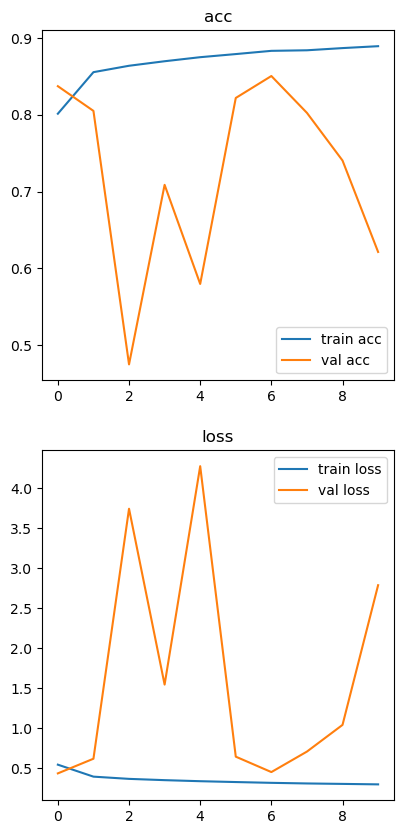

In [19]:
def history_graph():
    plt.figure(figsize=(10,10))
    train_acc=hist.history['accuracy']
    val_acc=hist.history['val_accuracy']
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    plt.subplot(2,2,1)
    plt.plot(train_acc,label='train acc')
    plt.plot(val_acc,label='val acc')
    plt.legend()
    plt.title('acc')
    plt.subplot(2,2,3)
    plt.plot(train_loss,label='train loss')
    plt.plot(val_loss,label='val loss')
    plt.legend()
    plt.title('loss')
history_graph()

In [20]:
# Save the model in .h5 format
cnn_model.save('cnn_model.h5')
